In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from datetime import datetime
from sklearn.model_selection import train_test_split


In [19]:
imgd=ImageDataGenerator(rescale=1/255)

In [20]:
tumor_dataset=imgd.flow_from_directory('archive (7)\Training')

Found 2870 images belonging to 4 classes.


In [21]:
tumor_dataset.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [22]:
classes=pd.DataFrame(tumor_dataset.classes)
classes.value_counts()

3    827
0    826
1    822
2    395
dtype: int64

In [23]:
path_train = 'archive (7)\Training'
path_test = 'archive (7)\Testing'

import tensorflow as tf
import tensorflow.keras.layers as tfl

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_data = train_datagen.flow_from_directory(
        path_train,
        subset='training',
        target_size=(200 , 200),
        batch_size=32)

val_data = train_datagen.flow_from_directory(
        path_train,
        subset='validation',
        target_size=(200 , 200),
        batch_size=32 )
test_data = train_datagen.flow_from_directory(
        path_test,
        target_size=(200 , 200),
        batch_size=32 )

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [24]:
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout,Conv2D,MaxPool2D

In [25]:
model =Sequential()

#convolution and maxpoollayer
model.add(Conv2D(filters=25,kernel_size=3,
                 strides=2,padding='valid',input_shape=(200,200,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))

#flatten layer
model.add(Flatten())

#hidden layer
model.add(Dense(16))
model.add(Activation('relu'))

#output layer
model.add(Dense(4))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 99, 25)        700       
_________________________________________________________________
activation_3 (Activation)    (None, 99, 99, 25)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60025)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                960416    
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit (train_data,epochs=10, validation_data=val_data)

Epoch 1/10
72/72 [==============================] - 13s 185ms/step - loss: 0.9136 - accuracy: 0.5951 - val_loss: 1.1678 - val_accuracy: 0.4939
Epoch 2/10
72/72 [==============================] - 13s 179ms/step - loss: 0.4769 - accuracy: 0.7963 - val_loss: 1.1330 - val_accuracy: 0.5079
Epoch 3/10
72/72 [==============================] - 13s 178ms/step - loss: 0.2699 - accuracy: 0.8907 - val_loss: 0.9607 - val_accuracy: 0.6789
Epoch 4/10
72/72 [==============================] - 14s 188ms/step - loss: 0.1569 - accuracy: 0.9408 - val_loss: 1.0266 - val_accuracy: 0.6876
Epoch 5/10
72/72 [==============================] - 14s 193ms/step - loss: 0.1045 - accuracy: 0.9608 - val_loss: 1.1560 - val_accuracy: 0.6632
Epoch 6/10
72/72 [==============================] - 13s 186ms/step - loss: 0.0820 - accuracy: 0.9652 - val_loss: 1.0457 - val_accuracy: 0.6894
Epoch 7/10
72/72 [==============================] - 14s 188ms/step - loss: 0.0435 - accuracy: 0.9782 - val_loss: 1.1059 - val_accuracy: 0.6806

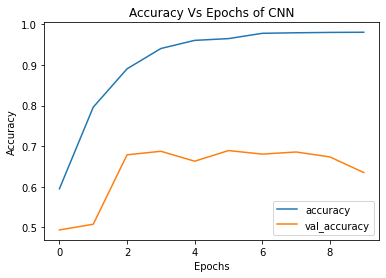

In [28]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Vs Epochs of CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

In [29]:
model.evaluate(train_data)

72/72 [==============================] - 8s 108ms/step - loss: 0.0218 - accuracy: 0.9813


[0.02177371457219124, 0.9812799096107483]

In [30]:
model.evaluate(test_data)

13/13 [==============================] - 1s 84ms/step - loss: 3.6601 - accuracy: 0.6015


[3.6601293087005615, 0.6015228629112244]

In [31]:
y_predicte=model.predict(test_data)
y_predicte

array([[8.0652995e-10, 8.7902063e-06, 1.0455549e-03, 6.5645218e-11],
       [6.4511988e-14, 4.2591587e-08, 7.3915274e-10, 8.1948419e-06],
       [1.2945144e-06, 5.0616264e-04, 4.6535476e-08, 2.0486009e-08],
       ...,
       [5.7215011e-17, 1.5318602e-02, 6.2727928e-04, 4.6565779e-05],
       [2.2129334e-06, 8.5812509e-03, 5.5623354e-05, 2.8578556e-06],
       [6.7938454e-12, 9.8761481e-01, 9.9999899e-01, 1.9607052e-10]],
      dtype=float32)

In [32]:
tumor_classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in range (len(y_predicte)):
    predicted_tumor=tumor_classes[np.argmax(y_predicte[i])]
    print(predicted_tumor)

no_tumor
pituitary_tumor
meningioma_tumor
pituitary_tumor
no_tumor
meningioma_tumor
no_tumor
meningioma_tumor
no_tumor
no_tumor
no_tumor
meningioma_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
no_tumor
meningioma_tumor
no_tumor
no_tumor
no_tumor
no_tumor
meningioma_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
pituitary_tumor
no_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
no_tumor
glioma_tumor
no_tumor
pituitary_tumor
glioma_tumor
no_tumor
meningioma_tumor
no_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
no_tumor
meningioma_tumor
no_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
meningioma_tumor
pituitary_tumor
no_tumor
no_tumor
no_tumor
no_tumor
no_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
pituitary_tumor
no_tumor
no_tumor
glioma_tumor
meningioma_tumor
no_tumor
no_tumor
meningioma_tumor
no_